In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Admission_Predict_Ver1.csv")

In [3]:
df.shape

(500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
df.drop(columns=['Serial No.'],inplace=True)

In [9]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [11]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [14]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [16]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [17]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [18]:
y_test

304    0.62
340    0.75
47     0.89
67     0.57
479    0.79
       ... 
11     0.84
192    0.86
92     0.34
221    0.75
110    0.61
Name: Chance of Admit , Length: 100, dtype: float64

## Bulid the Neural Network

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

C:\Users\ARIFA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss="mean_squared_error",optimizer="Adam",metrics=["accuracy"])

In [24]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.0000e+00 - loss: 0.7245 - val_accuracy: 0.0000e+00 - val_loss: 0.6191
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.5240 - val_accuracy: 0.0000e+00 - val_loss: 0.4907
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.4218 - val_accuracy: 0.0000e+00 - val_loss: 0.3821
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.3159 - val_accuracy: 0.0000e+00 - val_loss: 0.2680
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.2100 - val_accuracy: 0.0000e+00 - val_loss: 0.1613
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.1278 - val_accuracy: 0.0000e+00 - val_loss: 0.0857
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0622 - val_accuracy: 0.0000e+00 - val_loss: 0.0436
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - a

In [25]:
y_pred = model.predict(X_test_scaled)
y_pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[0.64147174],
       [0.68206906],
       [0.9520688 ],
       [0.7152763 ],
       [0.8433698 ],
       [0.66428393],
       [0.75913876],
       [0.77437824],
       [0.7709949 ],
       [0.6786151 ],
       [0.63781434],
       [0.59607834],
       [0.80986047],
       [0.7748593 ],
       [0.7713699 ],
       [0.85588646],
       [0.64316654],
       [0.7646737 ],
       [0.8956629 ],
       [0.654779  ],
       [0.6155548 ],
       [0.7620301 ],
       [0.88755274],
       [0.6471354 ],
       [0.7845279 ],
       [0.5526664 ],
       [0.9534509 ],
       [0.62953633],
       [0.8434832 ],
       [0.66951495],
       [0.64106894],
       [0.827943  ],
       [0.59222496],
       [0.9082242 ],
       [0.50404805],
       [0.8157774 ],
       [0.71187246],
       [0.6222852 ],
       [0.6680945 ],
       [0.91163325],
       [0.54794616],
       [0.6705795 ],
       [0.8566958 ],
       [0.9684651 ],
       [0.76542133],
       [0.52468956],
       [0.7094853 ],
       [0.678

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7846353542414933

In [27]:
history.history

{'accuracy': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'loss': [0.6769477725028992,
  0.5018922090530396,
  0.39704155921936035,
  0.2974415719509125,
  0.19301843643188477,
  0.10982885211706161,
  0.05437673255801201,
  0.027753492817282677,
  0.017526812851428986,
  0.015079637058079243,
  0.014471778646111488,
  0.01377746183425188,
  

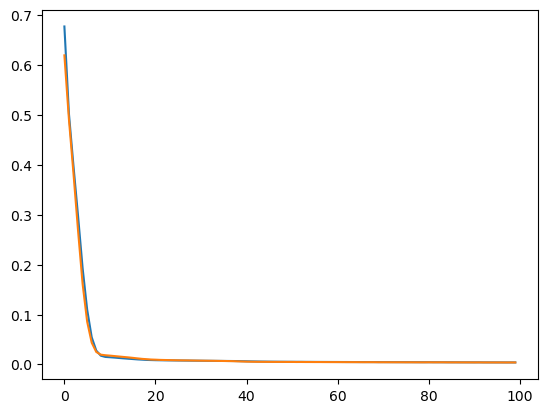

In [28]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

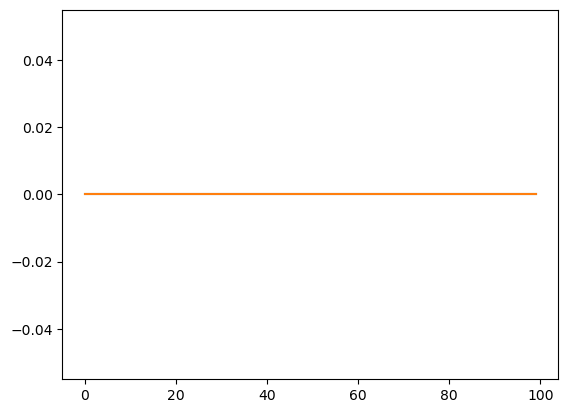

In [29]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [30]:
X_test_scaled[0]

array([0.46      , 0.5       , 0.25      , 0.375     , 0.14285714,
       0.5224359 , 0.        ])

In [31]:
y_test_array = y_test.to_numpy()

In [32]:
y_test_array[0]

0.62

In [33]:
y_pred = model.predict(X_test_scaled[0].reshape(1,7))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[0.6414717]], dtype=float32)